In [1]:
!pip install python-telegram-bot


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import telegram
API_KEY = '5569257444:AAGV21Ds4fkrxhXkrevkdvQ289vGVcajYTU'
bot = telegram.Bot(token=API_KEY)

In [3]:
updates = bot.get_updates()
updates

[]

In [39]:
for i in updates:
    print(i.message['chat']['id'])

In [5]:
bot.sendMessage(chat_id='1760120639', text='구른다')

In [6]:
# 필요한 라이브러리 설치 및 불러오기
!pip install -U finance-datareader
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import sys
fdr.__version__


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


'0.9.34'

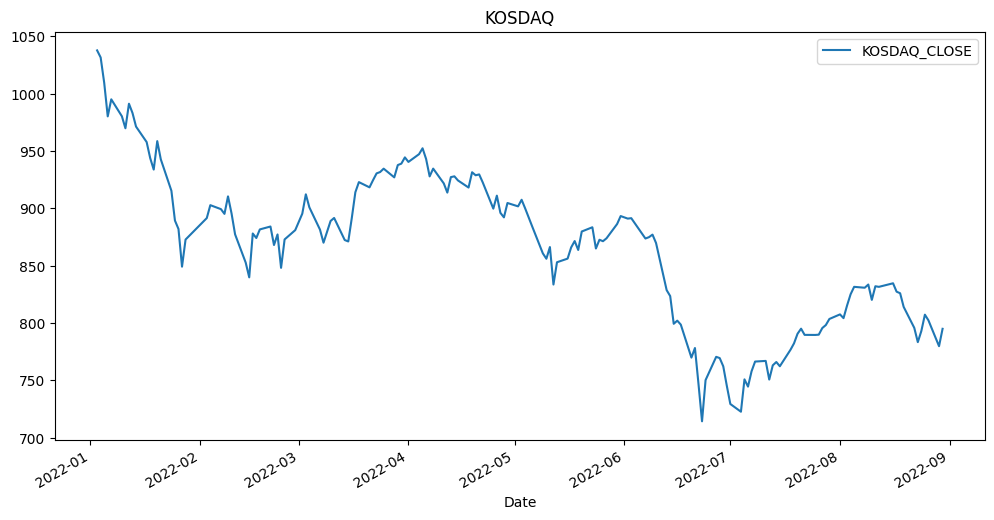

In [7]:
plt.style.use(['default']) # 다크모드에서 보기
plt.title('KOSDAQ')
df = fdr.DataReader('KQ11', '2022')
df['Close'].plot(figsize=(12,6), label='KOSDAQ_CLOSE')
plt.legend()
plt.show()


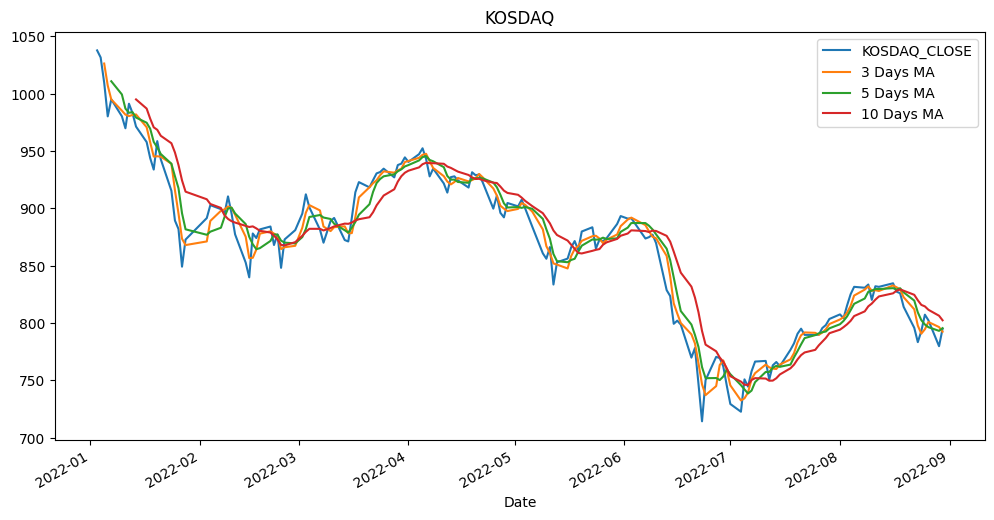

In [8]:
# 3,5,10 단순이동평균
plt.title('KOSDAQ')
df['Close'].plot(figsize=(12,6), label='KOSDAQ_CLOSE')
df['Close'].rolling(3).mean().plot(label = '3 Days MA')
df['Close'].rolling(5).mean().plot(label = '5 Days MA')
df['Close'].rolling(10).mean().plot(label = '10 Days MA')
plt.legend()
plt.show()

In [9]:
code = 'KQ11'
df = fdr.DataReader('KQ11','2022-08').reset_index()
# 3,5,10 이동평균 딕셔너리에 할당
df['close_sma3d'] = df['Close'].rolling(3).mean()
df['close_sma5d'] = df['Close'].rolling(5).mean()
df['close_sma10d'] = df['Close'].rolling(10).mean()


In [10]:
df.iloc[-10:]

,Date,Close,Open,High,Low,Volume,Change,close_sma3d,close_sma5d,close_sma10d
11,2022-08-17,827.42,834.91,834.96,825.46,1.130000e+09,-0.0088,831.263333,829.242,828.288
12,2022-08-18,826.06,822.71,826.75,817.52,9.505300e+08,-0.0016,829.406667,830.400,829.358
13,2022-08-19,814.17,827.25,827.32,814.17,8.874500e+08,-0.0144,822.550000,826.804,828.259
14,2022-08-22,795.87,806.90,806.92,795.87,8.118800e+08,-0.0225,812.033333,819.652,824.682
15,2022-08-23,783.42,789.95,793.81,781.92,8.557200e+08,-0.0156,797.820000,809.388,819.938
16,2022-08-24,793.14,788.36,793.14,782.97,7.149000e+08,0.0124,790.810000,802.532,815.887
17,2022-08-25,807.37,795.18,807.37,794.16,6.303100e+08,0.0179,794.643333,798.794,814.597
18,2022-08-26,802.45,810.33,813.00,801.84,7.183600e+08,-0.0061,800.986667,796.450,811.627
19,2022-08-29,779.89,780.48,783.45,775.33,6.080700e+05,-0.0281,796.570000,793.254,806.453
20,2022-08-30,795.04,783.99,796.44,783.99,5.555600e+05,0.0194,792.460000,795.578,802.483


In [26]:
# dataframe 재구성
df2 = df.loc[: ,['Date','Close', 'close_sma3d','close_sma5d','close_sma10d']].iloc[-1:]
df2

,Date,Close,close_sma3d,close_sma5d,close_sma10d
20,2022-08-30,795.04,792.46,795.578,802.483


In [28]:
print('\n--- Close for 2022-08-03 ---\n')

print(df.loc[ df['Date'] == '2022-08-03', 'Close'])

print('\n--- Previous Close < Close ---\n')

df['Previous Close'] = df['Close'].shift(1)
# df['Previous Date']  = df['Date'].shift(1)

lower_close = df[ df['Previous Close'] < df['Close'] ]
print(lower_close[['Previous Close', 'Close', 'Date']])

print('\n--- alert_three,five,ten_days ---\n')

# 3, 5, 10 마켓타이밍 유무 딕셔너리에 할당
alert_three_days = df2[(df2['Close'] > df2['close_sma3d']) | (df2['Close'] > df2['close_sma5d']) | (df2['Close'] > df2['close_sma10d'])]
print(df2)

# def display(row):
#     print(f" - {row['Date']} Signal 발생! now_price {row['Close']} 3일이동평균 {row['close_sma3d']}")
# df2['Three'].apply(display, axis=1)

# 3, 5, 10 마켓타이밍시 코스닥 현재가와 이동평균가 출력
for index, row in alert_three_days.iterrows():
    print(f" - {row['Date']} Signal 발생! 코스닥_현재가 {row['Close']} 3일이동평균 {row['close_sma3d']:.2f} 5일이동평균 {row['close_sma5d']:.2f} 10일이동평균 {row['close_sma10d']:.2f}")




--- Close for 2022-08-03 ---

2    815.36
Name: Close, dtype: float64

--- Previous Close < Close ---

    Previous Close   Close       Date
2           804.34  815.36 2022-08-03
3           815.36  825.16 2022-08-04
4           825.16  831.64 2022-08-05
6           830.86  833.65 2022-08-09
8           820.27  832.15 2022-08-11
10          831.63  834.74 2022-08-16
16          783.42  793.14 2022-08-24
17          793.14  807.37 2022-08-25
20          779.89  795.04 2022-08-30

--- alert_three,five,ten_days ---

         Date   Close  close_sma3d  close_sma5d  close_sma10d
20 2022-08-30  795.04       792.46      795.578       802.483
 - 2022-08-30 00:00:00 Signal 발생! 코스닥_현재가 795.04 3일이동평균 792.46 5일이동평균 795.58 10일이동평균 802.48


In [34]:
!pip install schedule
!pip install bs4
!pip install datetime
!pip install pytz


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
     ---------------------------------------- 52.0/52.0 kB 2.8 MB/s eta 0:00:00
     ------------------------------------- 210.8/210.8 kB 12.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# 알람 보내기

import sys
import io
from bs4 import BeautifulSoup
import requests
import schedule
import time
import telegram
import pytz
import datetime

count = 1

def job():
    global count
    count += 1
    now = datetime.datetime.now(pytz.timezone('Asia/Seoul'))
    if now.hour > 15 or now.hour < 9:
        return
    
    sys.stderr = io.TextIOWrapper(sys.stderr.detach(), encoding = 'utf-8')
    sys.stdout = io.TextIOWrapper(sys.stdout.detach(), encoding = 'utf-8')

    token = 'your token'
    bot = telegram.Bot(token = token)
    chat_id = "1760120639"